## **Dataset Characteristics**

In this Jupyter notebook, we explain the cleaning of the given dataset and the evaluation of the entire cleaned dataset including added features.

Cleaned dataset excludes dates without weathercode as we assume that weather might have an inpiuut in the sales.

To get an overview, we analysed the dataset first : 
General overview - 'Warengruppe', we uses a bar chart with confidence intervals to display the relationship between the average sales per day of the week. The days of the week in the chart are sorted from Monday to Sunday. In addition, we examined each 'Warengruppe' on its own. However, 'Warengruppe Saisonbrot' needed some furhter investigation as the product has been for sale only for certain time periods (resulting in being taken out for the modelling).

In addition, we checked for days without any sales at all (most likely the shop was closed ;-)

### **0 - Import the file**

In [14]:
# Import the necessary libaries
import csv
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
import logging

# Read the file and check it out
df = pd.read_csv(r'/Users/jberndt/Desktop/2-2-opencampus/X-opencampus_ML/2_DS_and_ML/5-homework_week05/z-data_sorted-v1/5_has_wettercode.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009 entries, 0 to 7008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                7009 non-null   object 
 1   Bewoelkung           7009 non-null   float64
 2   Temperatur           7009 non-null   float64
 3   Windgeschwindigkeit  7009 non-null   float64
 4   Wettercode           7009 non-null   float64
 5   KielerWoche          7009 non-null   float64
 6   Warengruppe          7009 non-null   float64
 7   Umsatz               7009 non-null   float64
 8   Feiertage            7009 non-null   float64
 9   Ferientage           7009 non-null   float64
dtypes: float64(9), object(1)
memory usage: 547.7+ KB


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Warengruppe,Umsatz,Feiertage,Ferientage
0,2013-07-01,6.0,17.8375,15.0,20.0,0.0,1.0,148.828353,0.0,1.0
1,2013-07-01,6.0,17.8375,15.0,20.0,0.0,2.0,535.856285,0.0,1.0
2,2013-07-01,6.0,17.8375,15.0,20.0,0.0,3.0,201.198426,0.0,1.0
3,2013-07-01,6.0,17.8375,15.0,20.0,0.0,4.0,65.890169,0.0,1.0
4,2013-07-01,6.0,17.8375,15.0,20.0,0.0,5.0,317.475875,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7004,2018-07-30,6.0,27.7875,10.0,21.0,0.0,1.0,148.541340,0.0,1.0
7005,2018-07-30,6.0,27.7875,10.0,21.0,0.0,2.0,616.358562,0.0,1.0
7006,2018-07-30,6.0,27.7875,10.0,21.0,0.0,3.0,348.770346,0.0,1.0
7007,2018-07-30,6.0,27.7875,10.0,21.0,0.0,4.0,71.822977,0.0,1.0


### **1 - Creation of a bar chart: representation of the correlation of average sales per weekday (sorted from Monday to Sunday inclusive)**
### **and adding the confidence intervals of sales per weekday (using standard deviation of sales per weekday)**

To analyse the dataset only for each 'Warengruppe', we uses a bar chart with confidence intervals to display the relationship between the  
average sales per day of the week. The days of the week in the chart are sorted from Monday to Sunday.

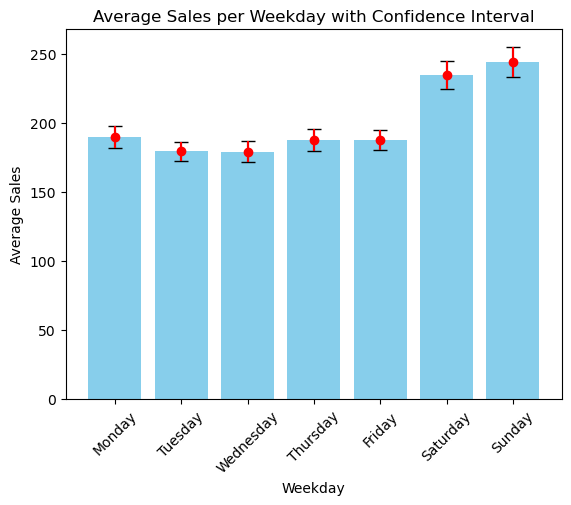

In [15]:
# Convert 'Datum' column to datetime format
df['Datum'] = pd.to_datetime(df['Datum'])

# Extract weekday from 'Datum' column
df['Weekday'] = df['Datum'].dt.weekday

# Calculate average sales per weekday
avg_sales_per_weekday = df.groupby('Weekday')['Umsatz'].mean()

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

# Calculate confidence interval
ci = 1.96 * df.groupby('Weekday')['Umsatz'].std() / np.sqrt(df.groupby('Weekday')['Umsatz'].count())

# Plot bar chart
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday with Confidence Interval')
plt.show()
logging.info(avg_sales_per_weekday) 

### **3 - List/Analyze the  column "Warengruppe"**

In [20]:
import pandas as pd

# Read the csv file
df_warengruppe = pd.read_csv(r'/Users/jberndt/Desktop/2-2-opencampus/X-opencampus_ML/2_DS_and_ML/5-homework_week05/z-data_sorted-v1/5_has_wettercode.csv')

# Convert the 'Warengruppe' column to strings
df_warengruppe['Warengruppe'] = df_warengruppe['Warengruppe'].astype(str)

# Split the 'Warengruppe' column into six new columns
df_warengruppe = pd.concat([df_warengruppe, pd.get_dummies(df_warengruppe['Warengruppe'], prefix='Warengruppe')], axis=1)

# Drop the 'Warengruppe' column as it's no longer needed
df_warengruppe.drop('Warengruppe', axis=1, inplace=True)

# Rename the new columns
df_warengruppe.rename(columns={'Warengruppe_1.0': 'Brot', 'Warengruppe_2.0': 'Broetchen', 'Warengruppe_3.0': 'Croissant', 'Warengruppe_4.0': 'Konditorei', 'Warengruppe_5.0': 'Kuchen', 'Warengruppe_6.0': 'Saisonbrot'}, inplace=True)

# Save the new DataFrame into a new CSV file
df_warengruppe.to_csv('5-1_has_wettercode_single_warengruppen.csv', index=False)

# Show the new file
# Save the new DataFrame into a new CSV file
df_warengruppe.to_csv('5-1_has_wettercode_single_warengruppen.csv', index=False) 

df = pd.read_csv(r'/Users/jberndt/Desktop/2-2-opencampus/X-opencampus_ML/2_DS_and_ML/5-homework_week05/5-1_has_wettercode_single_warengruppen.csv')
df.info
df


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Umsatz,Feiertage,Ferientage,Brot,Broetchen,Croissant,Konditorei,Kuchen,Saisonbrot
0,2013-07-01,6.0,17.8375,15.0,20.0,0.0,148.828353,0.0,1.0,1,0,0,0,0,0
1,2013-07-01,6.0,17.8375,15.0,20.0,0.0,535.856285,0.0,1.0,0,1,0,0,0,0
2,2013-07-01,6.0,17.8375,15.0,20.0,0.0,201.198426,0.0,1.0,0,0,1,0,0,0
3,2013-07-01,6.0,17.8375,15.0,20.0,0.0,65.890169,0.0,1.0,0,0,0,1,0,0
4,2013-07-01,6.0,17.8375,15.0,20.0,0.0,317.475875,0.0,1.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7004,2018-07-30,6.0,27.7875,10.0,21.0,0.0,148.541340,0.0,1.0,1,0,0,0,0,0
7005,2018-07-30,6.0,27.7875,10.0,21.0,0.0,616.358562,0.0,1.0,0,1,0,0,0,0
7006,2018-07-30,6.0,27.7875,10.0,21.0,0.0,348.770346,0.0,1.0,0,0,1,0,0,0
7007,2018-07-30,6.0,27.7875,10.0,21.0,0.0,71.822977,0.0,1.0,0,0,0,1,0,0


#### **3.1 - List/Analyze the  column "Warengruppe - *Brot*"**

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/1457479738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brot['Datum'] = pd.to_datetime(df_brot['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/1457479738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brot['Weekday'] = df_brot['Datum'].dt.weekday


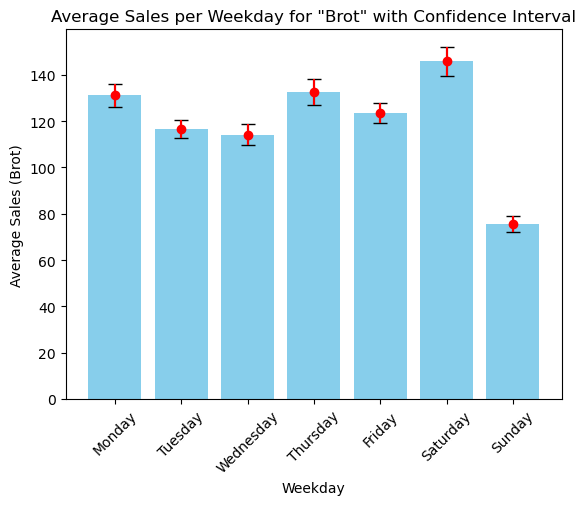

In [25]:
# Filter the DataFrame to keep only the rows where 'Brot' equals 1
df_brot = df[df['Brot'] == 1]

# Convert 'Datum' column to datetime format in place
df_brot['Datum'] = pd.to_datetime(df_brot['Datum'])

# Extract weekday from 'Datum' column in place
df_brot['Weekday'] = df_brot['Datum'].dt.weekday

# Calculate average sales per weekday for the 'Brot' column
avg_sales_per_weekday = df_brot.groupby('Weekday')['Umsatz'].mean()

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

# Calculate confidence interval
ci = 1.96 * df_brot.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_brot.groupby('Weekday')['Umsatz'].count())

# Plot bar chart for the 'Brot' column
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales (Brot)')
plt.title('Average Sales per Weekday for "Brot" with Confidence Interval')
plt.show()

# Assign the modified DataFrame back to the variable `df_brot`
df_brot = df_brot.reset_index(drop=True)

# Print the updated DataFrame
# print(df_brot.head())
# logging.info(avg_sales_per_weekday)

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2412016903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brot['Datum'] = pd.to_datetime(df_brot['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2412016903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brot['Month'] = df_brot['Datum'].dt.month


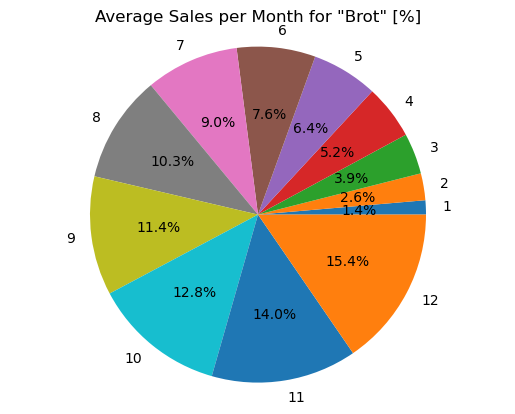

In [34]:
# Filter the DataFrame to keep only the rows where 'Brot' equals 1
df_brot = df[df['Brot'] == 1]

# Convert 'Datum' column to datetime format in place
df_brot['Datum'] = pd.to_datetime(df_brot['Datum'])

# Extract month from 'Datum' column
df_brot['Month'] = df_brot['Datum'].dt.month

# Calculate the percentage of total sales for each month
monthly_sales = df_brot.groupby('Month')['Umsatz'].sum().cumsum().div(df_brot['Umsatz'].sum()).reset_index(name='Percentage')

# Plot the data using Matplotlib as a pie chart
fig, ax = plt.subplots()
ax.pie(monthly_sales['Percentage'], labels=monthly_sales['Month'], autopct='%1.1f%%')
ax.axis('equal')

ax.set_title('Average Sales per Month for "Brot" [%]')
plt.show()

#### **3.2 - List/Analyze the  column "Warengruppe - *Broetchen*"**

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2309501592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_broetchen['Datum'] = pd.to_datetime(df_broetchen['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2309501592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_broetchen['Weekday'] = df_broetchen['Datum'].dt.weekday


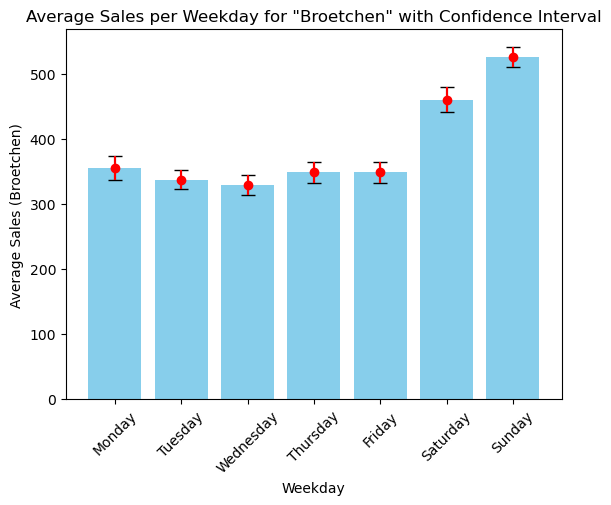

In [27]:
# Filter the DataFrame to keep only the rows where 'Brot' equals 1
df_broetchen = df[df['Broetchen'] == 1]

# Convert 'Datum' column to datetime format in place
df_broetchen['Datum'] = pd.to_datetime(df_broetchen['Datum'])

# Extract weekday from 'Datum' column in place
df_broetchen['Weekday'] = df_broetchen['Datum'].dt.weekday

# Calculate average sales per weekday for the 'Brot' column
avg_sales_per_weekday = df_broetchen.groupby('Weekday')['Umsatz'].mean()

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

# Calculate confidence interval
ci = 1.96 * df_broetchen.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_broetchen.groupby('Weekday')['Umsatz'].count())

# Plot bar chart for the 'Broetchen' column
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales (Broetchen)')
plt.title('Average Sales per Weekday for "Broetchen" with Confidence Interval')
plt.show()

# Assign the modified DataFrame back to the variable `df_brot`
df_broetchen = df_broetchen.reset_index(drop=True)

# Print the updated DataFrame
# print(df_broetchen.head())
# logging.info(avg_sales_per_weekday)

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2186385790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_broetchen['Datum'] = pd.to_datetime(df_broetchen['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2186385790.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_broetchen['Month'] = df_broetchen['Datum'].dt.month


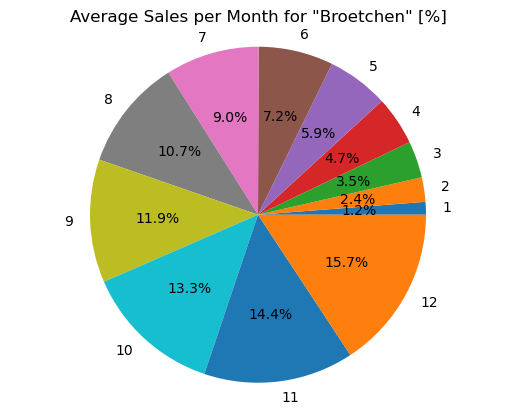

In [36]:
# Filter the DataFrame to keep only the rows where 'Broetchen' equals 1
df_broetchen = df[df['Broetchen'] == 1]

# Convert 'Datum' column to datetime format in place
df_broetchen['Datum'] = pd.to_datetime(df_broetchen['Datum'])

# Extract month from 'Datum' column
df_broetchen['Month'] = df_broetchen['Datum'].dt.month

# Calculate the percentage of total sales for each month
monthly_sales = df_broetchen.groupby('Month')['Umsatz'].sum().cumsum().div(df_broetchen['Umsatz'].sum()).reset_index(name='Percentage')

# Plot the data using Matplotlib as a pie chart
fig, ax = plt.subplots()
ax.pie(monthly_sales['Percentage'], labels=monthly_sales['Month'], autopct='%1.1f%%')
ax.axis('equal')

ax.set_title('Average Sales per Month for "Broetchen" [%]')
plt.show()

#### **3.3 - List/Analyze the  column "Warengruppe - *Croissant*"**

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2912436696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_croissant['Datum'] = pd.to_datetime(df_croissant['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2912436696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_croissant['Weekday'] = df_croissant['Datum'].dt.weekday


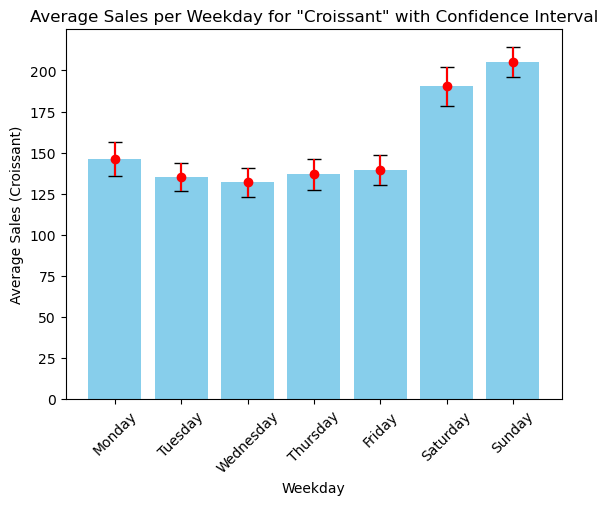

In [30]:
# Filter the DataFrame to keep only the rows where 'Croissant' equals 1
df_croissant = df[df['Croissant'] == 1]

# Convert 'Datum' column to datetime format in place
df_croissant['Datum'] = pd.to_datetime(df_croissant['Datum'])

# Extract weekday from 'Datum' column in place
df_croissant['Weekday'] = df_croissant['Datum'].dt.weekday

# Calculate average sales per weekday for the 'Croissant' column
avg_sales_per_weekday = df_croissant.groupby('Weekday')['Umsatz'].mean()

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

# Calculate confidence interval
ci = 1.96 * df_croissant.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_croissant.groupby('Weekday')['Umsatz'].count())

# Plot bar chart for the 'Croissant' column
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales (Croissant)')
plt.title('Average Sales per Weekday for "Croissant" with Confidence Interval')
plt.show()

# Assign the modified DataFrame back to the variable `df_brot`
df_croissant = df_croissant.reset_index(drop=True)

# Print the updated DataFrame
# print(df_croissant.head())
# logging.info(avg_sales_per_weekday)

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/3977383965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_croissant['Datum'] = pd.to_datetime(df_croissant['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/3977383965.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_croissant['Month'] = df_croissant['Datum'].dt.month


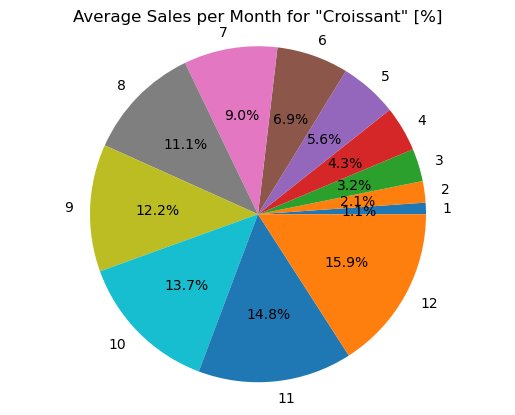

In [39]:
# Filter the DataFrame to keep only the rows where 'Croissant' equals 1
df_croissant = df[df['Croissant'] == 1]

# Convert 'Datum' column to datetime format in place
df_croissant['Datum'] = pd.to_datetime(df_croissant['Datum'])

# Extract month from 'Datum' column
df_croissant['Month'] = df_croissant['Datum'].dt.month

# Calculate the percentage of total sales for each month
monthly_sales = df_croissant.groupby('Month')['Umsatz'].sum().cumsum().div(df_croissant['Umsatz'].sum()).reset_index(name='Percentage')

# Plot the data using Matplotlib as a pie chart
fig, ax = plt.subplots()
ax.pie(monthly_sales['Percentage'], labels=monthly_sales['Month'], autopct='%1.1f%%')
ax.axis('equal')

ax.set_title('Average Sales per Month for "Croissant" [%]')
plt.show()

#### **3.4 - List/Analyze the  column "Warengruppe - *Konditorei*"**

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/982693466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_konditorei['Datum'] = pd.to_datetime(df_konditorei['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/982693466.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_konditorei['Weekday'] = df_konditorei['Datum'].dt.weekday


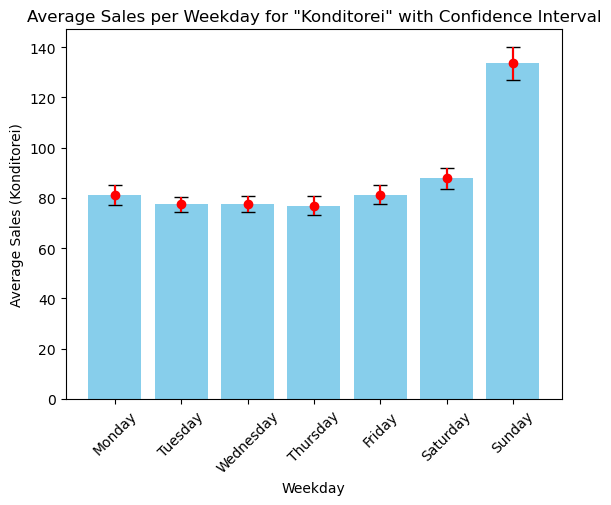

In [31]:
# Filter the DataFrame to keep only the rows where 'Konditorei' equals 1
df_konditorei = df[df['Konditorei'] == 1]

# Convert 'Datum' column to datetime format in place
df_konditorei['Datum'] = pd.to_datetime(df_konditorei['Datum'])

# Extract weekday from 'Datum' column in place
df_konditorei['Weekday'] = df_konditorei['Datum'].dt.weekday

# Calculate average sales per weekday for the 'Brot' column
avg_sales_per_weekday = df_konditorei.groupby('Weekday')['Umsatz'].mean()

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

# Calculate confidence interval
ci = 1.96 * df_konditorei.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_konditorei.groupby('Weekday')['Umsatz'].count())

# Plot bar chart for the 'Brot' column
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales (Konditorei)')
plt.title('Average Sales per Weekday for "Konditorei" with Confidence Interval')
plt.show()

# Assign the modified DataFrame back to the variable `df_konditorei`
df_konditorei = df_konditorei.reset_index(drop=True)

# Print the updated DataFrame
# print(df_konditorei.head())
# logging.info(avg_sales_per_weekday)

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/794121621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_konditorei['Datum'] = pd.to_datetime(df_konditorei['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/794121621.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_konditorei['Month'] = df_konditorei['Datum'].dt.month


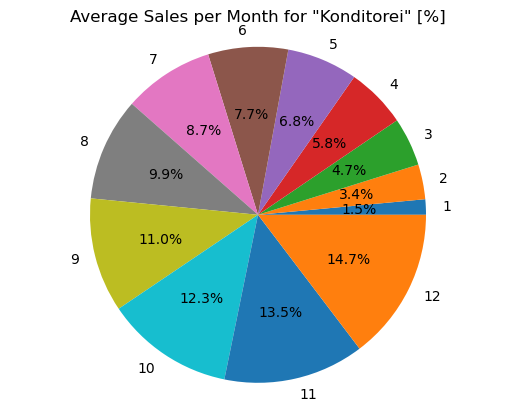

In [40]:
# Filter the DataFrame to keep only the rows where 'Konditorei' equals 1
df_konditorei = df[df['Konditorei'] == 1]

# Convert 'Datum' column to datetime format in place
df_konditorei['Datum'] = pd.to_datetime(df_konditorei['Datum'])

# Extract month from 'Datum' column
df_konditorei['Month'] = df_konditorei['Datum'].dt.month

# Calculate the percentage of total sales for each month
monthly_sales = df_konditorei.groupby('Month')['Umsatz'].sum().cumsum().div(df_konditorei['Umsatz'].sum()).reset_index(name='Percentage')

# Plot the data using Matplotlib as a pie chart
fig, ax = plt.subplots()
ax.pie(monthly_sales['Percentage'], labels=monthly_sales['Month'], autopct='%1.1f%%')
ax.axis('equal')

ax.set_title('Average Sales per Month for "Konditorei" [%]')
plt.show()

#### **3.5 - List/Analyze the  column "Warengruppe - *Kuchen*"**

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2554282218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kuchen['Datum'] = pd.to_datetime(df_kuchen['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2554282218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kuchen['Weekday'] = df_kuchen['Datum'].dt.weekday


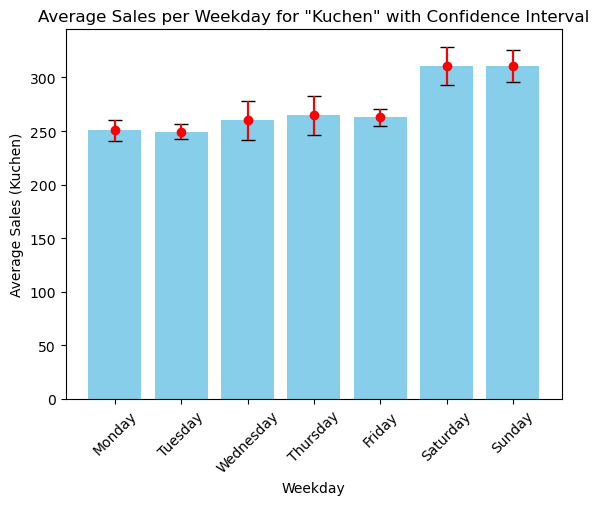

In [32]:
# Filter the DataFrame to keep only the rows where 'Kuchen' equals 1
df_kuchen = df[df['Kuchen'] == 1]

# Convert 'Datum' column to datetime format in place
df_kuchen['Datum'] = pd.to_datetime(df_kuchen['Datum'])

# Extract weekday from 'Datum' column in place
df_kuchen['Weekday'] = df_kuchen['Datum'].dt.weekday

# Calculate average sales per weekday for the 'Kuchen' column
avg_sales_per_weekday = df_kuchen.groupby('Weekday')['Umsatz'].mean()

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

# Calculate confidence interval
ci = 1.96 * df_kuchen.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_kuchen.groupby('Weekday')['Umsatz'].count())

# Plot bar chart for the 'Brot' column
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales (Kuchen)')
plt.title('Average Sales per Weekday for "Kuchen" with Confidence Interval')
plt.show()

# Assign the modified DataFrame back to the variable `df_brot`
df_kuchen = df_kuchen.reset_index(drop=True)

# Print the updated DataFrame
# print(df_kuchen.head())
# logging.info(avg_sales_per_weekday)

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2396328660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kuchen['Datum'] = pd.to_datetime(df_kuchen['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/2396328660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kuchen['Month'] = df_kuchen['Datum'].dt.month


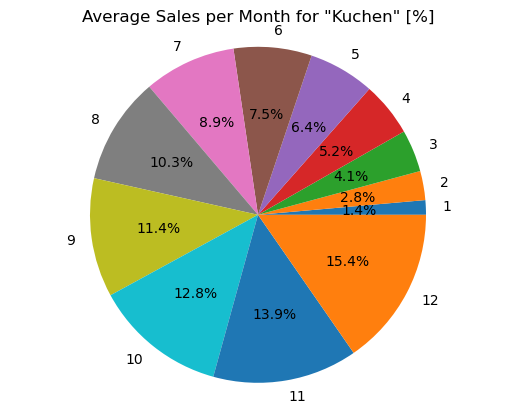

In [41]:
# Filter the DataFrame to keep only the rows where 'Kuchen' equals 1
df_kuchen = df[df['Kuchen'] == 1]

# Convert 'Datum' column to datetime format in place
df_kuchen['Datum'] = pd.to_datetime(df_kuchen['Datum'])

# Extract month from 'Datum' column
df_kuchen['Month'] = df_kuchen['Datum'].dt.month

# Calculate the percentage of total sales for each month
monthly_sales = df_kuchen.groupby('Month')['Umsatz'].sum().cumsum().div(df_kuchen['Umsatz'].sum()).reset_index(name='Percentage')

# Plot the data using Matplotlib as a pie chart
fig, ax = plt.subplots()
ax.pie(monthly_sales['Percentage'], labels=monthly_sales['Month'], autopct='%1.1f%%')
ax.axis('equal')

ax.set_title('Average Sales per Month for "Kuchen" [%]')
plt.show()

#### **3.6 - List/Analyze the  column "Warengruppe - *Saisonbrot*"**

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/1529174163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saisonbrot['Datum'] = pd.to_datetime(df_brot['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/1529174163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saisonbrot['Weekday'] = df_saisonbrot['Datum'].dt.weekday


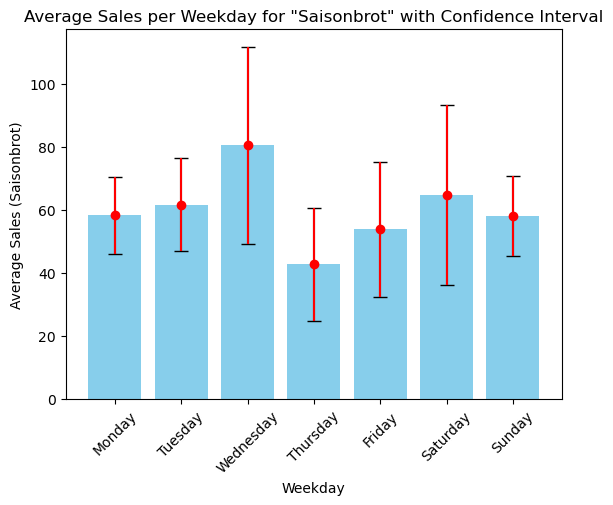

In [33]:
# Filter the DataFrame to keep only the rows where 'Saisonbrot' equals 1
df_saisonbrot = df[df['Saisonbrot'] == 1]

# Convert 'Datum' column to datetime format in place
df_saisonbrot['Datum'] = pd.to_datetime(df_brot['Datum'])

# Extract weekday from 'Datum' column in place
df_saisonbrot['Weekday'] = df_saisonbrot['Datum'].dt.weekday

# Calculate average sales per weekday for the 'Saisonbrot' column
avg_sales_per_weekday = df_saisonbrot.groupby('Weekday')['Umsatz'].mean()

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

# Calculate confidence interval
ci = 1.96 * df_saisonbrot.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_saisonbrot.groupby('Weekday')['Umsatz'].count())

# Plot bar chart for the 'Saisonbrot' column
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales (Saisonbrot)')
plt.title('Average Sales per Weekday for "Saisonbrot" with Confidence Interval')
plt.show()

# Assign the modified DataFrame back to the variable `df_saisonbrot`
df_saisonbrot = df_saisonbrot.reset_index(drop=True)

# Print the updated DataFrame
# print(df_saisonbrot.head())
# logging.info(avg_sales_per_weekday)

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/3413173550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saisonbrot['Datum'] = pd.to_datetime(df_saisonbrot['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/3413173550.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saisonbrot['Month'] = df_saisonbrot['Datum'].dt.month


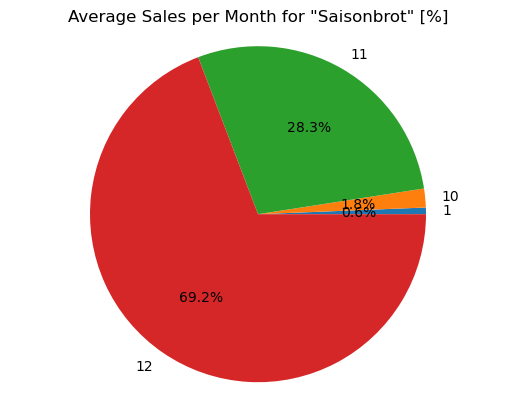

In [48]:
# Filter the DataFrame to keep only the rows where 'Saisonbrot' equals 1
df_saisonbrot = df[df['Saisonbrot'] == 1]

# Convert 'Datum' column to datetime format in place
df_saisonbrot['Datum'] = pd.to_datetime(df_saisonbrot['Datum'])

# Extract month from 'Datum' column
df_saisonbrot['Month'] = df_saisonbrot['Datum'].dt.month

# Calculate the percentage of total sales for each month
monthly_sales = df_saisonbrot.groupby('Month')['Umsatz'].sum().cumsum().div(df_saisonbrot['Umsatz'].sum()).reset_index(name='Percentage')

# Plot the data using Matplotlib as a pie chart
fig, ax = plt.subplots()
ax.pie(monthly_sales['Percentage'], labels=monthly_sales['Month'], autopct='%1.1f%%')
ax.axis('equal')

ax.set_title('Average Sales per Month for "Saisonbrot" [%]')
plt.show()

/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/1847569010.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_november_december['Datum'] = pd.to_datetime(df_november_december['Datum'])
/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/1847569010.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_november_december['Weekday'] = df_november_december['Datum'].dt.weekday


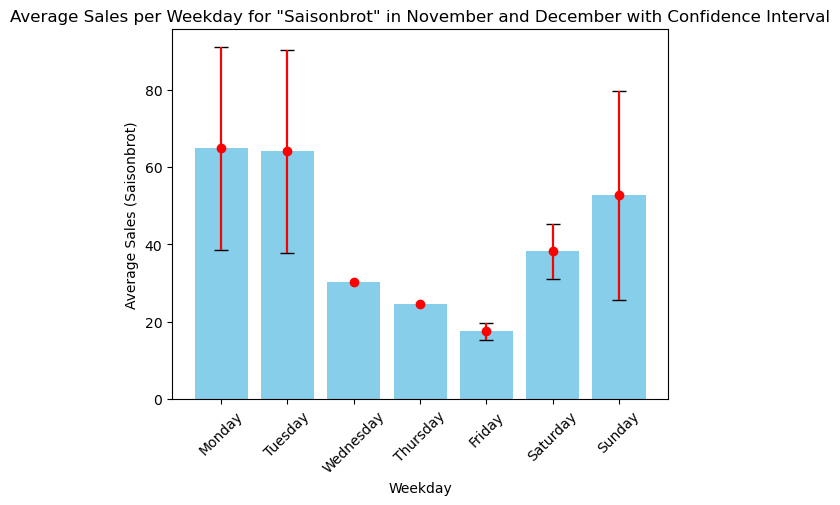

In [43]:
# Filter the DataFrame to keep only the rows where 'Saisonbrot' equals 1
df_saisonbrot = df_saisonbrot[df_saisonbrot['Saisonbrot'] == 1]

# Extract 'Month' from 'Datum' column in place
df_saisonbrot['Month'] = df_saisonbrot['Datum'].dt.month

# Filter the DataFrame to keep only the rows where 'Saisonbrot' equals 1 and 'Month' is in ['November', 'December']
df_november_december = df_saisonbrot[df_saisonbrot['Month'].isin([11, 12])]

# Convert 'Datum' column to datetime format in place
df_november_december['Datum'] = pd.to_datetime(df_november_december['Datum'])

# Extract weekday from 'Datum' column in place
df_november_december['Weekday'] = df_november_december['Datum'].dt.weekday

# Calculate average sales per weekday for the 'Saisonbrot' column in November and December
avg_sales_per_weekday = df_november_december.groupby('Weekday')['Umsatz'].mean()

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

# Calculate confidence interval for November and December
ci = 1.96 * df_november_december.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_november_december.groupby('Weekday')['Umsatz'].count())

# Plot bar chart for the 'Saisonbrot' column in November and December
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales (Saisonbrot)')
plt.title('Average Sales per Weekday for "Saisonbrot" in November and December with Confidence Interval')
plt.show()

# Assign the modified DataFrame back to the variable `df_saisonbrot`
df_saisonbrot = df_november_december.reset_index(drop=True)

# Print the updated DataFrame
# print(df_saisonbrot.head())
# logging.info(avg_sales_per_weekday)


/var/folders/df/036b7scd3f90j03plj3rnhrxnr0csc/T/ipykernel_40632/1051179201.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_november_december = df_saisonbrot[df_saisonbrot['Saisonbrot'] == 1] \


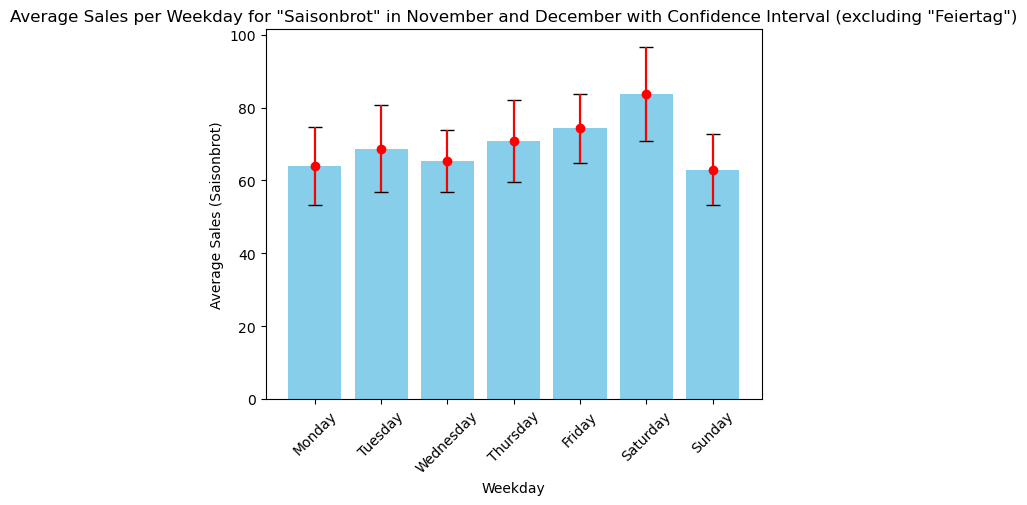

In [49]:
# Filter the DataFrame to keep only the rows where 'Saisonbrot' equals 1 and 'Month' is in ['November', 'December'] and 'Feiertage' is not equal to '1'
df_november_december = df_saisonbrot[df_saisonbrot['Saisonbrot'] == 1] \
                           [df_saisonbrot['Month'].isin([11, 12])] \
                           [df_saisonbrot['Feiertage'].ne(1)]

# Convert 'Datum' column to datetime format in place
df_november_december['Datum'] = pd.to_datetime(df_november_december['Datum'])

# Extract weekday from 'Datum' column in place
df_november_december['Weekday'] = df_november_december['Datum'].dt.weekday

# Calculate average sales per weekday for the 'Saisonbrot' column in November and December
avg_sales_per_weekday = df_november_december.groupby('Weekday')['Umsatz'].mean()

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

# Calculate confidence interval for November and December
ci = 1.96 * df_november_december.groupby('Weekday')['Umsatz'].std() / np.sqrt(df_november_december.groupby('Weekday')['Umsatz'].count())

# Plot bar chart for the 'Saisonbrot' column in November and December
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci.values, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales (Saisonbrot)')
plt.title('Average Sales per Weekday for "Saisonbrot" in November and December with Confidence Interval (excluding "Feiertag")')
plt.show()

# Assign the modified DataFrame back to the variable `df_saisonbrot`
df_saisonbrot = df_november_december.reset_index(drop=True)

# Print the updated DataFrame
# print(df_saisonbrot.head())
# logging.info(avg_sales_per_weekday)

### **4 - Overview of all the missing dates in the 'Datum' column between 2013-07-01 and 2018-07-30 (plus weekdays for interpretation)** 

In [64]:
# Convert the 'Datum' column to a datetime object:
df['Datum'] = pd.to_datetime(df['Datum'])

# Check for missing dates:
missing_dates = pd.date_range(start=df['Datum'].min(), end=df['Datum'].max()).difference(df['Datum'])

# Convert the 'DatetimeIndex' object to a 'Series' object:
missing_dates = missing_dates.to_series()

# Write the missing dates to a new CSV file:
missing_dates.to_csv('missing_dates.csv', header=False, index=False)

# Read the file and check it out
df = pd.read_csv(r'/Users/jberndt/Desktop/2-2-opencampus/X-opencampus_ML/2_DS_and_ML/5-homework_week05/missing_dates.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   2013-07-02  495 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


,2013-07-02
0,2013-07-05
1,2013-07-06
2,2013-07-07
3,2013-07-09
4,2013-07-12
...,...
490,2018-07-12
491,2018-07-17
492,2018-07-19
493,2018-07-23


In [77]:
df = pd.read_csv(r'/Users/jberndt/Desktop/2-2-opencampus/X-opencampus_ML/2_DS_and_ML/5-homework_week05/missing_dates.csv')
df['Datum'] = pd.to_datetime(df['Datum'])
df['Day_of_Week'] = df['Datum'].dt.day_name()
df.to_csv('missing_dates_plus.csv', index=False)

# Read the file and check it out
df = pd.read_csv(r'/Users/jberndt/Desktop/2-2-opencampus/X-opencampus_ML/2_DS_and_ML/5-homework_week05/missing_dates_plus.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Datum        496 non-null    object
 1   Day_of_Week  496 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


,Datum,Day_of_Week
0,2013-07-02,Tuesday
1,2013-07-05,Friday
2,2013-07-06,Saturday
3,2013-07-07,Sunday
4,2013-07-09,Tuesday
...,...,...
491,2018-07-12,Thursday
492,2018-07-17,Tuesday
493,2018-07-19,Thursday
494,2018-07-23,Monday
